# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포

In [3]:
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3


In [4]:
data.describe()

,Attrition,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
count,1250.000000,1250.000000,1196.000000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.00000,1250.000000
mean,0.160000,36.931200,9.258361,2.729600,6525.548000,2.678600,15.216000,2.717600,11.33920,2.761600
std,0.366753,9.122162,8.166016,1.110617,4676.979554,2.473647,3.625556,1.074977,7.79687,0.715245
min,0.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.00000,1.000000
25%,0.000000,30.000000,2.000000,2.000000,2932.250000,1.000000,12.000000,2.000000,6.00000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,4988.000000,2.000000,14.000000,3.000000,10.00000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,8437.500000,4.000000,18.000000,4.000000,15.00000,3.000000
max,1.000000,60.000000,29.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.00000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int64  
 1   Age                       1250 non-null   int64  
 2   DistanceFromHome          1196 non-null   float64
 3   Gender                    1250 non-null   object 
 4   JobSatisfaction           1250 non-null   int64  
 5   MaritalStatus             1250 non-null   object 
 6   MonthlyIncome             1250 non-null   int64  
 7   NumCompaniesWorked        1229 non-null   float64
 8   OverTime                  1250 non-null   object 
 9   PercentSalaryHike         1250 non-null   int64  
 10  RelationshipSatisfaction  1250 non-null   int64  
 11  TotalWorkingYears         1250 non-null   int64  
 12  WorkLifeBalance           1250 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 127.1+ KB


<AxesSubplot:>

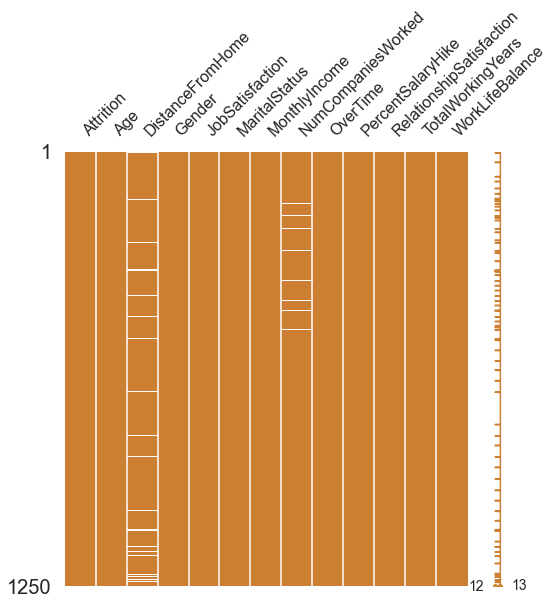

In [7]:
msno.matrix(df=data.iloc[:,:],figsize = (8,8),color = (0.8,0.5,0.2))

<AxesSubplot:>

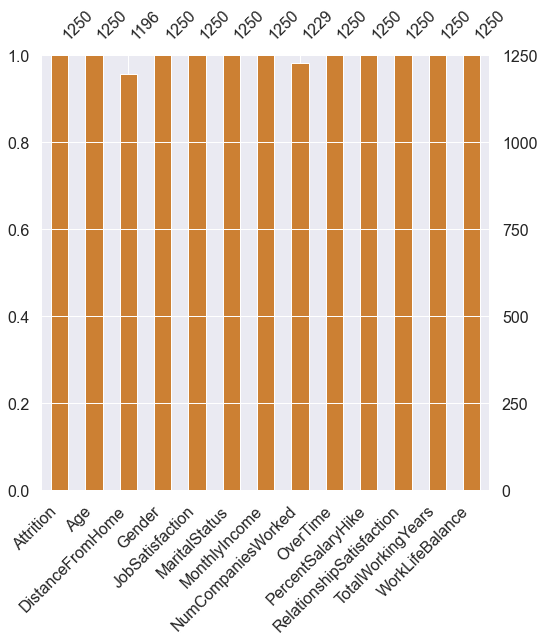

In [9]:
msno.bar(df=data.iloc[:,:],figsize = (8,8),color = (0.8,0.5,0.2))

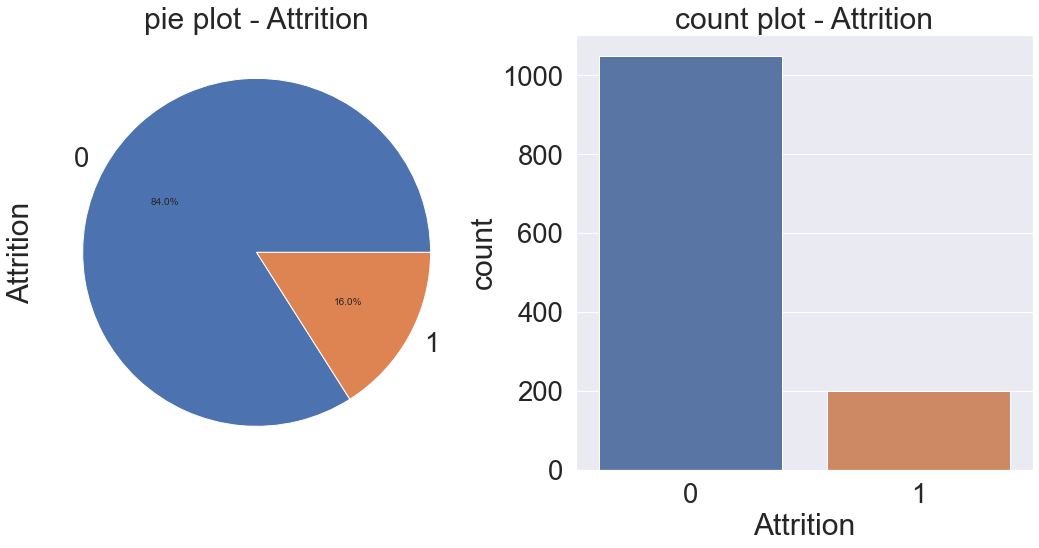

<class 'pandas.core.series.Series'>


In [10]:
f,ax = plt.subplots(1,2,figsize = (18,8))

data["Attrition"].value_counts().plot.pie(autopct = "%1.1f%%",ax= ax[0])
ax[0].set_title("pie plot - Attrition")
sns.countplot('Attrition',data = data,ax=ax[1])
ax[1].set_title("count plot - Attrition")

plt.show()

print(type(data["Attrition"]))

In [ ]:
data

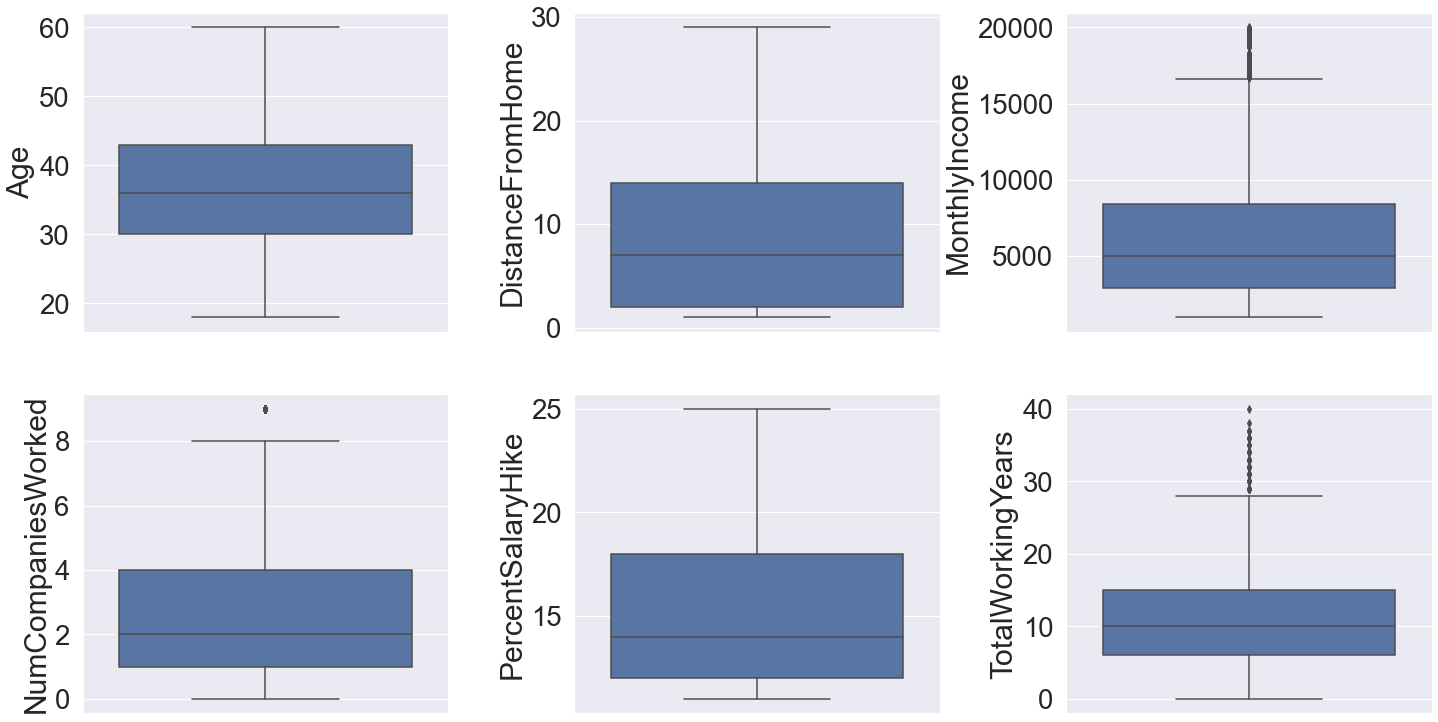

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
data_n = data[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears']]
index = 0
axs = axs.flatten()
for k,v in data_n.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [84]:
def detect_outliers(df,n,featuers):
    
    outlier_indices = []
    for col in featuers :
        
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
    
    return multiple_outliers

Outliers_to_drop = detect_outliers(data,1,['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears'])

In [85]:
data.loc[Outliers_to_drop]

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
28,0,52,3.0,Male,1,Married,16856,1.0,No,11,1,34,4
33,0,50,2.0,Male,3,Married,17639,5.0,No,16,4,30,3
56,0,50,2.0,Male,1,Divorced,17924,1.0,No,11,4,31,3
67,0,50,3.0,Male,2,Married,18200,1.0,No,11,3,32,3
136,0,55,2.0,Male,1,Single,16756,7.0,No,15,2,31,4
140,0,55,26.0,Male,2,Married,19636,4.0,Yes,18,1,35,3
176,0,49,18.0,Male,3,Divorced,19502,1.0,Yes,17,3,31,3
196,0,55,14.0,Male,2,Single,18722,8.0,No,11,4,36,3
212,0,59,2.0,Female,4,Married,18844,9.0,No,21,4,30,3
213,0,55,26.0,Male,4,Married,19586,1.0,No,21,3,36,3


In [82]:
data.loc[Outliers_to_drop].shape[0]

26

In [88]:
no_outlier_data = data.drop(Outliers_to_drop,axis = 0).reset_index(drop = True)

### -> 이상치가 높은 데이터는 일반적인 관계를 만들어내기에 어려움을 줄 수 있다고 판단하여 제거하여 같이 비교해보자

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

## 1) Gender --> Attrtion

Attrition         0         1
Gender                       
Female     0.859184  0.140816
Male       0.827632  0.172368


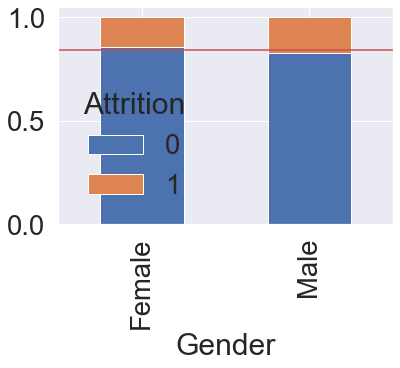

In [28]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

① 교차표(pd.crosstab())

In [32]:
pd.crosstab(data['Gender'], data['Attrition'], normalize = 'all')

Attrition,0,1
Gender,,
Female,0.3368,0.0552
Male,0.5032,0.1048


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
Gender                       
Female     0.859184  0.140816
Male       0.827632  0.172368


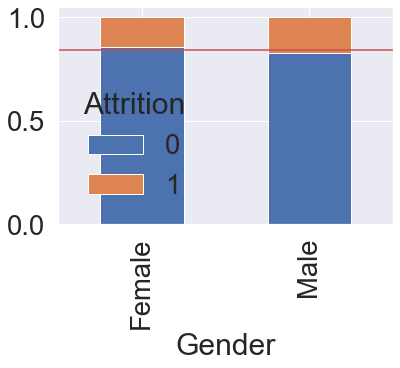

In [31]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

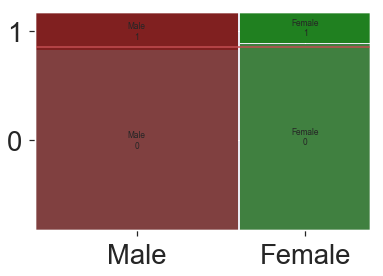

In [29]:
mosaic(data, [ 'Gender','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

#### - 관계가 약해보임

③ 가설검정(카이제곱검정)

In [63]:
table = pd.crosstab(data['Attrition'], data['Gender'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             421   629
1              69   131
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
기대빈도
 [[411.6 638.4]
 [ 78.4 121.6]]


In [89]:
table = pd.crosstab(no_outlier_data['Attrition'], no_outlier_data['Gender'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             412   613
1              68   131
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.2907541167679493
p-value 0.13014667515241374
기대빈도
 [[401.96078431 623.03921569]
 [ 78.03921569 120.96078431]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### -관계가 약함

# 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

In [33]:
pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'all')

Attrition,0,1
Gender,,
Female,0.3368,0.0552
Male,0.5032,0.1048


② 시각화( Stacked Bar, Mosaic)

Attrition             0         1
MaritalStatus                    
Divorced       0.916667  0.083333
Married        0.878947  0.121053
Single         0.732673  0.267327


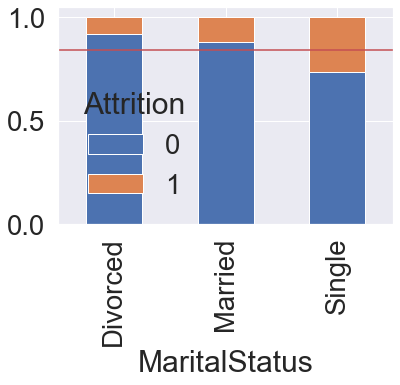

In [34]:
temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

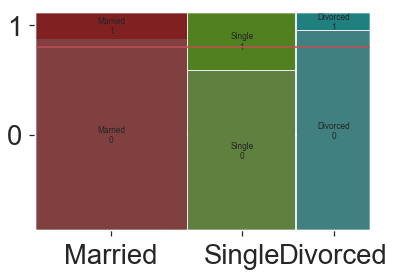

In [35]:
mosaic(data, [ 'MaritalStatus','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

### 싱글이 이직을 많이함 -> 관계 큼

③ 가설검정(카이제곱검정)

In [68]:
table = pd.crosstab(data['Attrition'], data['MaritalStatus'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   253      501     296
1                    23       69     108
----------------------------------------------------------------------------------------------------
카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
기대빈도
 [[231.84 478.8  339.36]
 [ 44.16  91.2   64.64]]


In [90]:
table = pd.crosstab(no_outlier_data['Attrition'],no_outlier_data['MaritalStatus'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   249      486     290
1                    23       68     108
----------------------------------------------------------------------------------------------------
카이제곱통계량 53.207909452925705
p-value 2.792860639766815e-12
기대빈도
 [[227.77777778 463.92973856 333.29248366]
 [ 44.22222222  90.07026144  64.70751634]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

## 결혼 관계 자체는 강한 관계

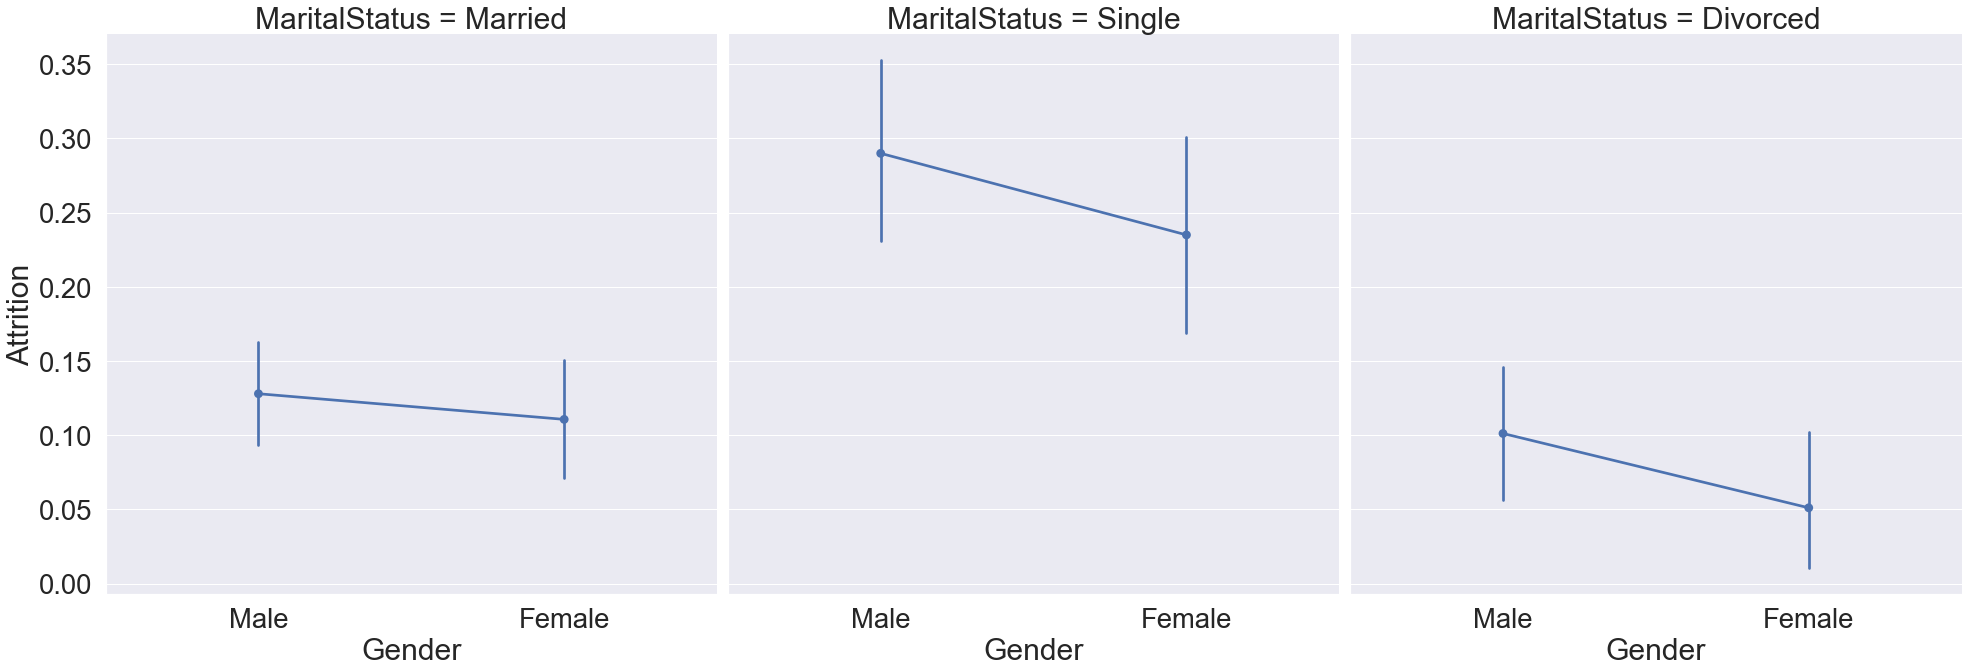

In [71]:
sns.factorplot("Gender","Attrition",col = "MaritalStatus",data = data,satureation = .5,size = 9,aspect = 1 )

##  -> gender와 MaritalStatus 를 합치니 관계성이 좀 보임

# 3) JobSatisfaction --> Attrtion

① 교차표(pd.crosstab())

In [36]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'all')

Attrition,0,1
JobSatisfaction,,
1,0.1576,0.0424
2,0.1568,0.0312
3,0.2464,0.0480
4,0.2792,0.0384


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
JobSatisfaction                    
1                0.788000  0.212000
2                0.834043  0.165957
3                0.836957  0.163043
4                0.879093  0.120907


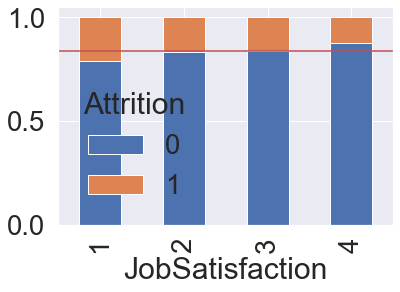

In [37]:
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

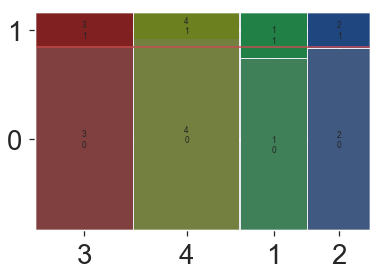

In [38]:
mosaic(data, [ 'JobSatisfaction','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

## 관계가 커보이지 않음

③ 가설검정(카이제곱검정)

In [92]:
table = pd.crosstab(data['Attrition'], data['JobSatisfaction'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                197  196  308  349
1                 53   39   60   48
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
기대빈도
 [[210.   197.4  309.12 333.48]
 [ 40.    37.6   58.88  63.52]]


In [93]:
table = pd.crosstab(no_outlier_data['Attrition'], no_outlier_data['JobSatisfaction'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                189  191  302  343
1                 53   39   60   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 10.83796765446249
p-value 0.012635101272435693
기대빈도
 [[202.65522876 192.60620915 303.14542484 326.59313725]
 [ 39.34477124  37.39379085  58.85457516  63.40686275]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

## 관계가 커보이지 않음

<AxesSubplot:xlabel='JobSatisfaction', ylabel='PercentSalaryHike'>

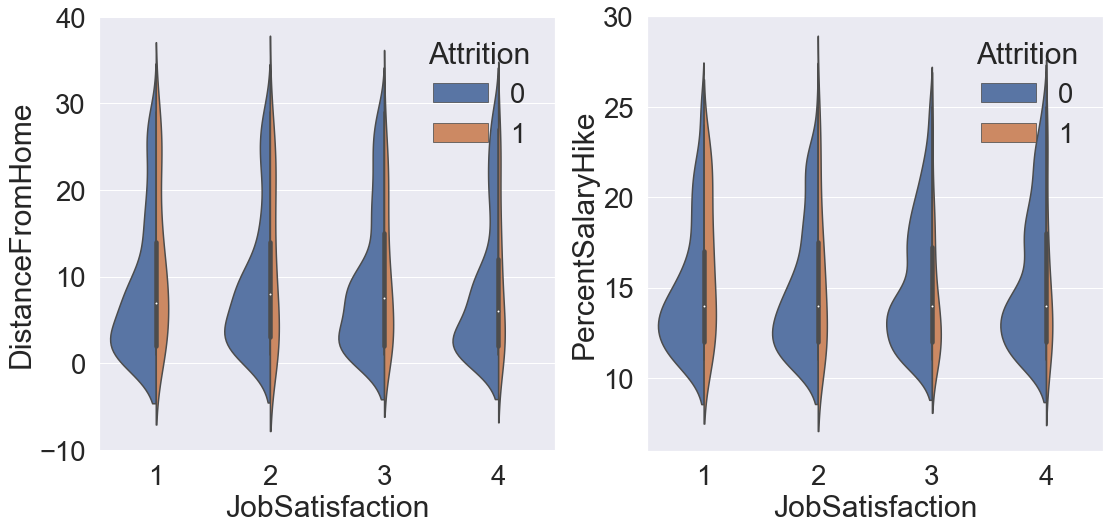

In [72]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("JobSatisfaction","DistanceFromHome",hue = "Attrition", data = data,scale = 'count',split = True,ax = ax[0])
sns.violinplot("JobSatisfaction","PercentSalaryHike",hue = "Attrition",data = data,scale = 'count',split = True,ax = ax[1])

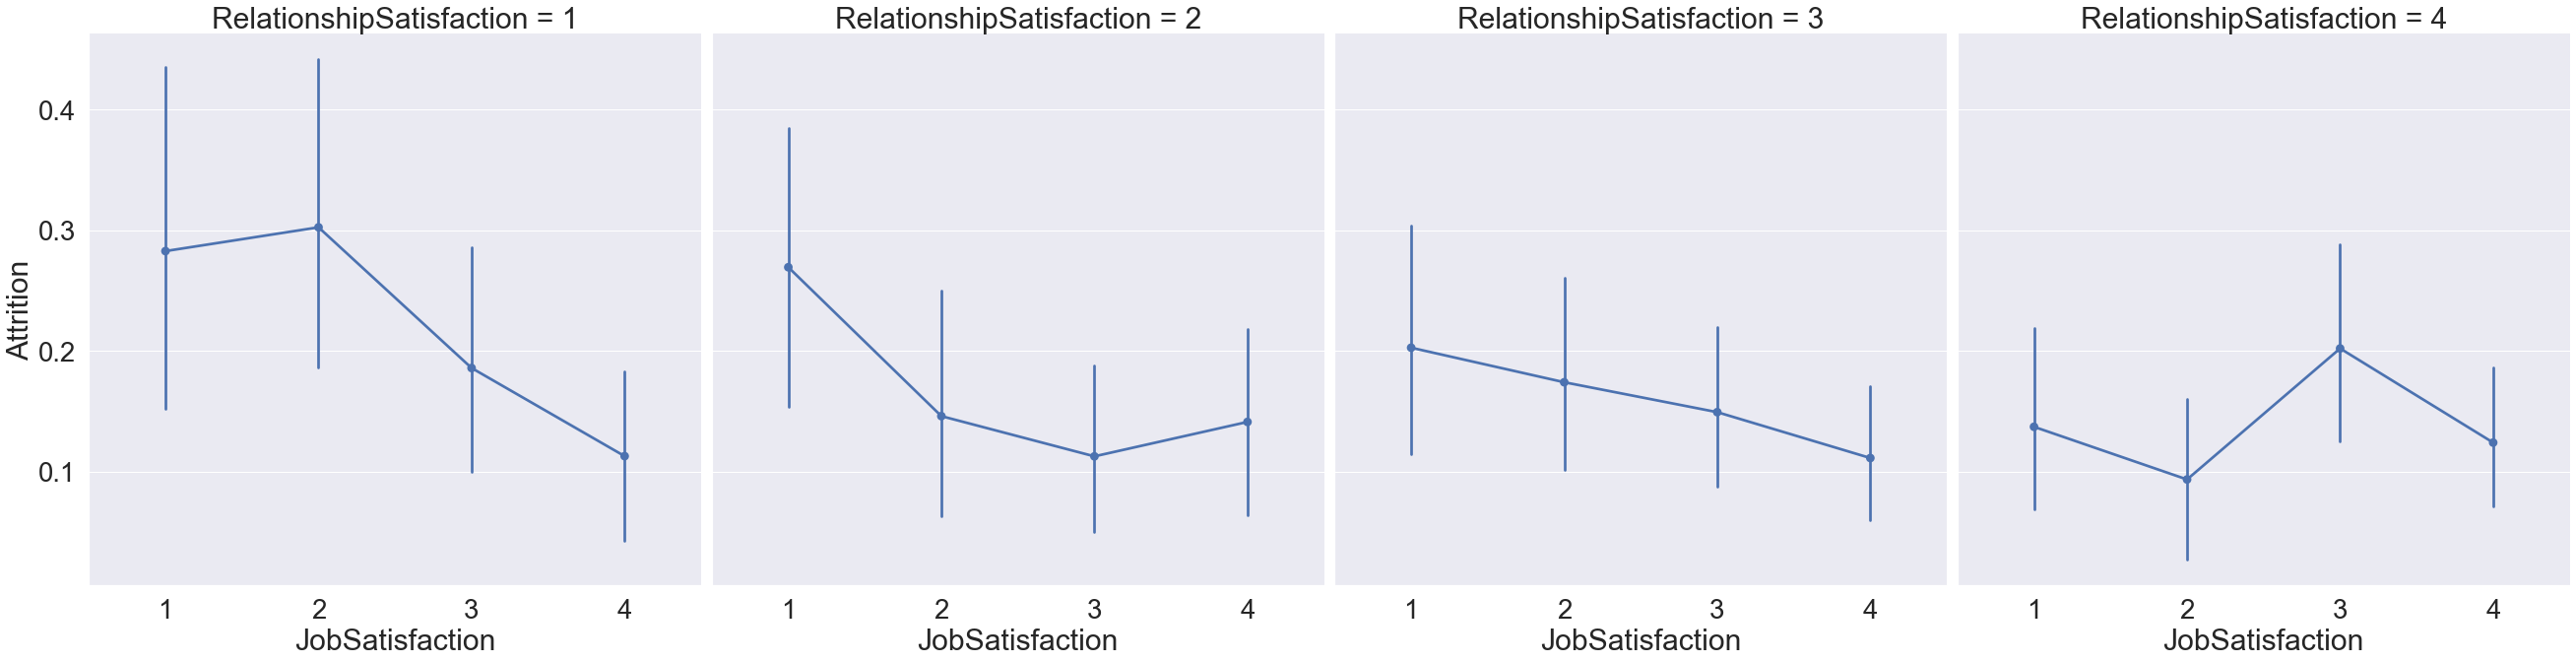

In [73]:
sns.factorplot("JobSatisfaction","Attrition",col = "RelationshipSatisfaction",data = data,satureation = .5,size = 9,aspect = 1 )

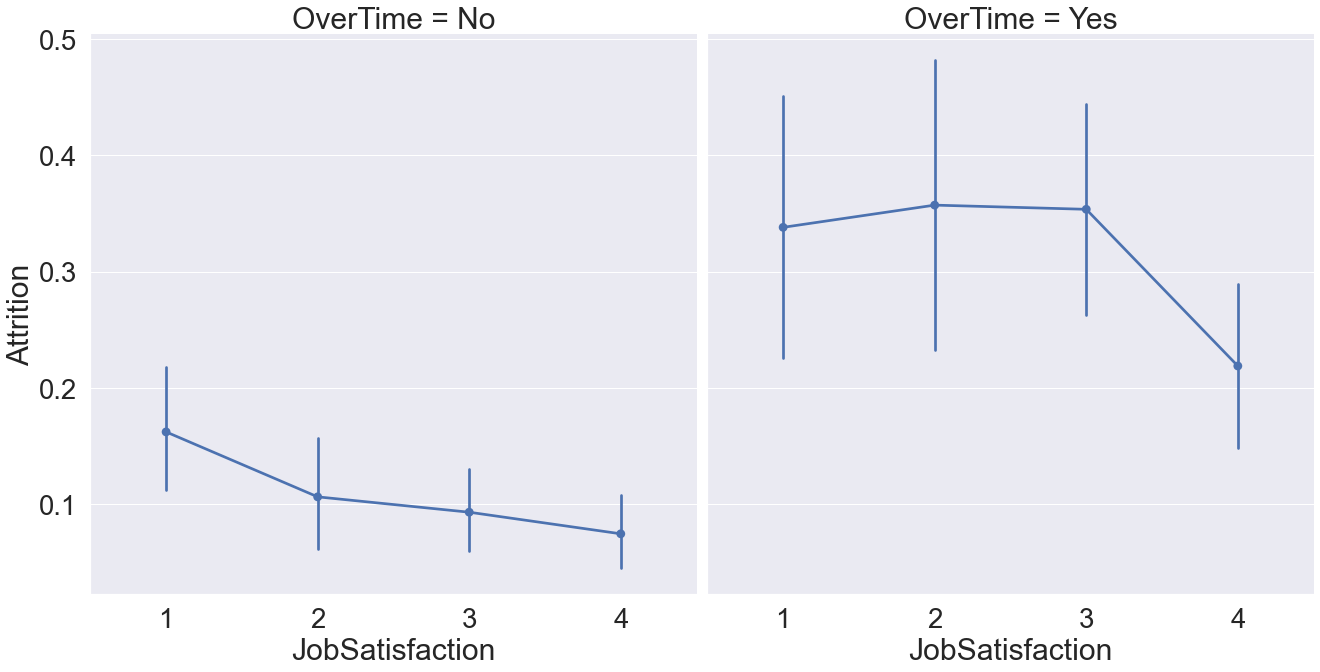

In [76]:
sns.factorplot("JobSatisfaction","Attrition",col = "OverTime",data = data,satureation = .5,size = 9,aspect = 1 )

# 4) RelationshipSatisfaction --> Attrtion

① 교차표(pd.crosstab())

In [50]:
pd.crosstab(data['RelationshipSatisfaction'], data['Attrition'], normalize = 'all')

Attrition,0,1
RelationshipSatisfaction,,
1,0.1464,0.0376
2,0.1736,0.0328
3,0.2696,0.0480
4,0.2504,0.0416


② 시각화( Stacked Bar, Mosaic)

Attrition                        0         1
RelationshipSatisfaction                    
1                         0.795652  0.204348
2                         0.841085  0.158915
3                         0.848866  0.151134
4                         0.857534  0.142466


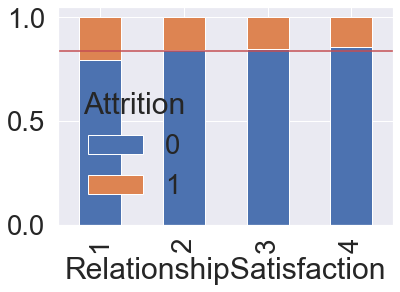

In [51]:
temp = pd.crosstab(data['RelationshipSatisfaction'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

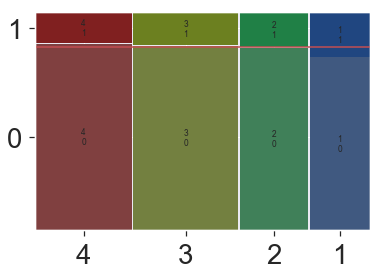

In [53]:
mosaic(data, [ 'RelationshipSatisfaction','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [94]:
table = pd.crosstab(data['Attrition'], data['RelationshipSatisfaction'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 RelationshipSatisfaction    1    2    3    4
Attrition                                   
0                         183  217  337  313
1                          47   41   60   52
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.435126158518535
p-value 0.2181503949975081
기대빈도
 [[193.2  216.72 333.48 306.6 ]
 [ 36.8   41.28  63.52  58.4 ]]


In [95]:
table = pd.crosstab(no_outlier_data['Attrition'], no_outlier_data['RelationshipSatisfaction'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 RelationshipSatisfaction    1    2    3    4
Attrition                                   
0                         178  215  328  304
1                          47   41   60   51
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.667955316379395
p-value 0.1977894587134891
기대빈도
 [[188.41911765 214.37908497 324.91830065 297.28349673]
 [ 36.58088235  41.62091503  63.08169935  57.71650327]]


# 5) OverTime --> Attrtion

① 교차표(pd.crosstab())

In [54]:
pd.crosstab(data['OverTime'], data['Attrition'], normalize = 'all')

Attrition,0,1
OverTime,,
No,0.6424,0.0744
Yes,0.1976,0.0856


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
OverTime                     
No         0.896205  0.103795
Yes        0.697740  0.302260


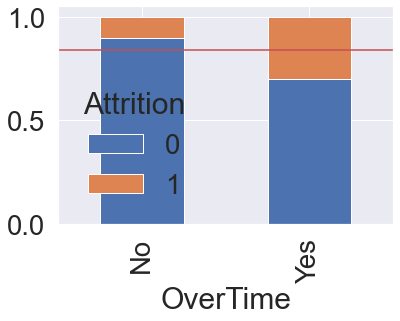

In [55]:
temp = pd.crosstab(data['OverTime'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

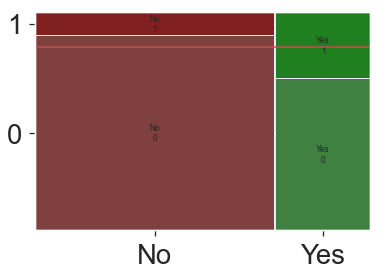

In [59]:
mosaic(data, [ 'OverTime','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [97]:
table = pd.crosstab(data['Attrition'], data['OverTime'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          803  247
1           93  107
----------------------------------------------------------------------------------------------------
카이제곱통계량 72.89605419432075
p-value 1.366611233098835e-17
기대빈도
 [[752.64 297.36]
 [143.36  56.64]]


In [98]:
table = pd.crosstab(no_outlier_data['Attrition'], no_outlier_data['OverTime'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          785  240
1           92  107
----------------------------------------------------------------------------------------------------
카이제곱통계량 74.10352449396596
p-value 7.412586657145714e-18
기대빈도
 [[734.41584967 290.58415033]
 [142.58415033  56.41584967]]


# 5) WorkLifeBalance --> Attrtion

In [58]:
pd.crosstab(data['WorkLifeBalance'], data['Attrition'], normalize = 'all')

Attrition,0,1
WorkLifeBalance,,
1,0.0392,0.0160
2,0.2008,0.0368
3,0.5112,0.0864
4,0.0888,0.0208


Attrition               0         1
WorkLifeBalance                    
1                0.710145  0.289855
2                0.845118  0.154882
3                0.855422  0.144578
4                0.810219  0.189781


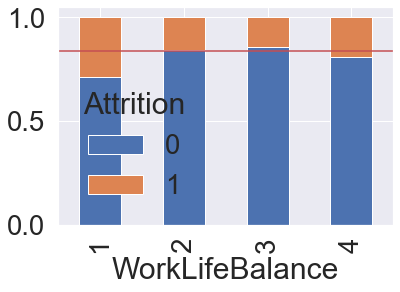

In [60]:
temp = pd.crosstab(data['WorkLifeBalance'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

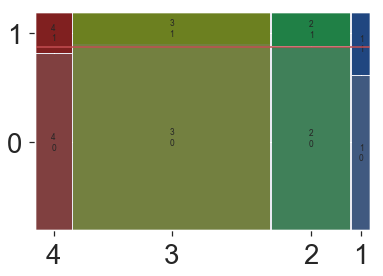

In [61]:
mosaic(data, [ 'WorkLifeBalance','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

In [100]:
table = pd.crosstab(data['Attrition'], data['WorkLifeBalance'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 WorkLifeBalance   1    2    3    4
Attrition                         
0                49  251  639  111
1                20   46  108   26
----------------------------------------------------------------------------------------------------
카이제곱통계량 10.940810822342662
p-value 0.012050277390233672
기대빈도
 [[ 57.96 249.48 627.48 115.08]
 [ 11.04  47.52 119.52  21.92]]


In [99]:
table = pd.crosstab(no_outlier_data['Attrition'], no_outlier_data['WorkLifeBalance'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 WorkLifeBalance   1    2    3    4
Attrition                         
0                48  247  622  108
1                20   46  107   26
----------------------------------------------------------------------------------------------------
카이제곱통계량 11.019475337933695
p-value 0.011621029839411243
기대빈도
 [[ 56.94444444 245.36356209 610.47794118 112.21405229]
 [ 11.05555556  47.63643791 118.52205882  21.78594771]]


# (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


① 그래프 : histogram, densityplot

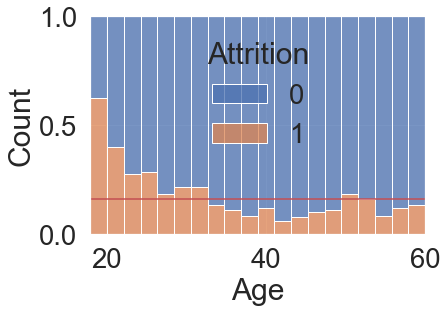

In [42]:
sns.histplot(x='Age', data = data, bins = 20
             , hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

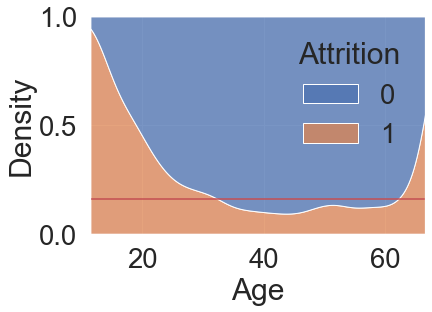

In [43]:
sns.kdeplot(x='Age', data = data, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [87]:
model = sm.Logit(data['Attrition'], data['Age'].notnull())
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.439670
         Iterations 6
Age    1.806685e-102
dtype: float64


# 2) DistanceFromHome --> Attrtion


① 그래프 : histogram, densityplot

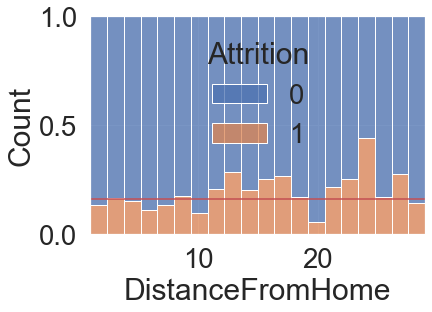

In [44]:
sns.histplot(x='DistanceFromHome', data = data, bins = 20
             , hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

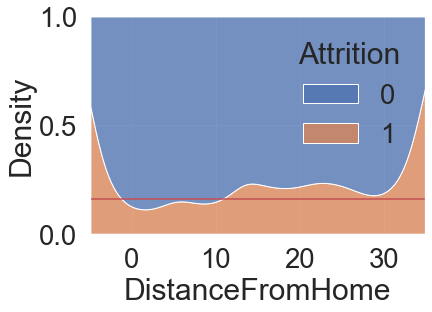

In [45]:
sns.kdeplot(x='DistanceFromHome', data = data, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [80]:
model = sm.Logit(data['Attrition'], data['DistanceFromHome'].notnull())
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.455416
         Iterations 6
DistanceFromHome    5.683824e-97
dtype: float64


# 3) MonthlyIncome --> Attrtion


① 그래프 : histogram, densityplot

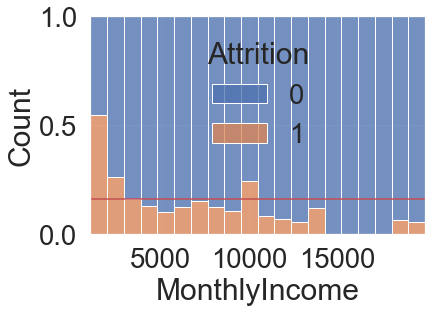

In [46]:
sns.histplot(x='MonthlyIncome', data = data, bins = 20
             , hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

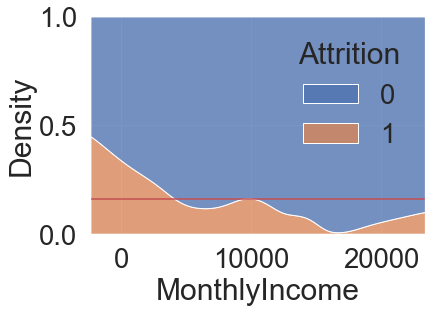

In [47]:
sns.kdeplot(x='MonthlyIncome', data = data, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [78]:
model = sm.Logit(data['Attrition'], data['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64
